In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Load image file with gray scale

(222, 180)


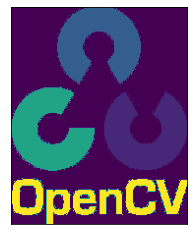

In [61]:
img = cv2.imread("./data/opencv-logo-white.png", 0)
print(img.shape)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Load image file with color

(222, 180, 3)


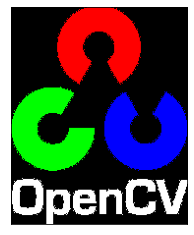

In [66]:
img = cv2.imread("./data/opencv-logo-white.png")
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

Second argument is an optional flag which could be any one of the following.
1. cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
2. cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
3. cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

(222, 180, 4)


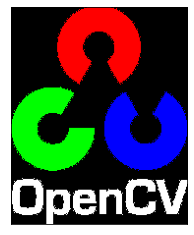

In [65]:
img = cv2.imread("./data/opencv-logo-white.png", cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)
plt.xticks([])
plt.yticks([])
plt.show()

## Image size

In [69]:
img = cv2.imread("./data/opencv-logo-white.png", cv2.IMREAD_UNCHANGED)
# get dimensions of image
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels) # Alpha, Red, Green and Blue channels.

Image Dimension    :  (222, 180, 4)
Image Height       :  222
Image Width        :  180
Number of Channels :  4


## Resize
reference : https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

(222, 180, 4)
(108, 133)
(133, 108, 4)


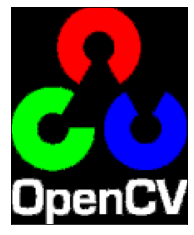

In [73]:
img2 = img.copy()
print(img2.shape)
scale_percent = 60 # percent of original size
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)
print(dim)

img2 = cv2.resize(img2, dim,interpolation = cv2.INTER_AREA)
print(img2.shape)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
plt.xticks([])
plt.yticks([])
plt.show()

## draw rectangle with text

(342, 548, 3)


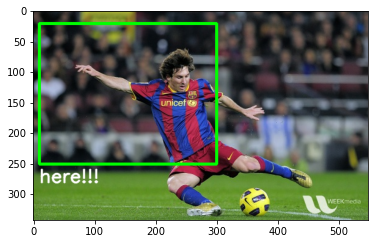

In [85]:
img = cv2.imread("./data/messi5.jpg")
print(img.shape)
x1, y1, x2, y2 = 10,20,300,250
cv2.rectangle(img,(x1,y1),(x2, y2), (0,255,0), 3) # 3rd arg is (R,G,B), 4th arg is thickness

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'here!!!',(x1,y2+30), font, 1,(255,255,255),2,cv2.LINE_AA) # 4th arg is Font Scale (specifies the size of font)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

## Object Detection

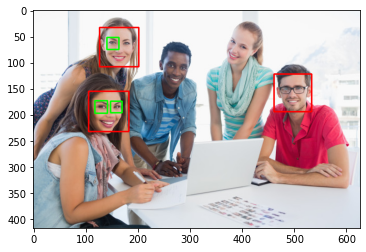

In [92]:
import os

img = cv2.imread("./data/people_working.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_eye.xml'))

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))